# Введение в искусственные нейронные сети
# Урок 4. Сверточные нейронные сети

## Домашнее задание

1. обучить рукописную сверточную нейронную сеть (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar-10
2. оценить рост точности при увеличении ширины сети (больше фильтров)
3. оценить рост точности при увеличении глубины сети (больше слоев)
4. *сравнить с точностью полносвязной сети для этой выборки

### 1. Импорты 

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Загрузка и подготовка данных

In [3]:
num_classes = 10

# разделение тренировочной и тестовой выборки
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


X_train = X_train / 255.0
X_test = X_test / 255.0

X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [4]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

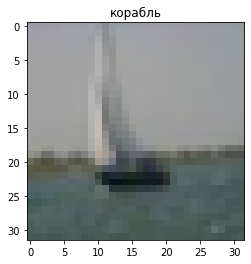

In [5]:
N = 55

plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

In [6]:
tf.random.set_seed(1)

### 3. Подготовка моделей

Обучу модели с разным количеством слоев и с разным количеством фильтров

In [7]:
n_layers = (2, 3, 4, 5)
k_filters = (1, 1.5, 2, 2.5)

In [10]:
models = {}
for layers in n_layers:
    for k_filter in k_filters:
        # конфигурирование слоев нейросети
        model = Sequential()

        # слои нейросети отвественные за свертку и max-pooling
        model.add(Conv2D(32 * k_filter, (3, 3), padding='same', input_shape=X_train.shape[1:]))
        model.add(Activation('relu'))
        for layer in range(layers):
            model.add(Conv2D(32 * k_filter + 16 * layer, (3, 3), padding='same'))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))
            model.add(Dropout(0.25))

        # полносвязные слои нейронной сети
        model.add(Flatten())
        model.add(Dense(256 + 128*(layers - 3.5)))
        model.add(Activation('relu'))
        model.add(Dense(num_classes))
        model.add(Activation('softmax'))
        # компиляция модели
        model.compile(loss='categorical_crossentropy',
                      optimizer='Adam',
                      metrics=['accuracy'])
        model_name = f'nn_{layers} layers_{32*k_filter} first layer filters'
        models[model_name] = model

### 4. Обучение моделей

Epoch 1/2
196/196 [==============================] - 4s 18ms/step - loss: 0.7819 - accuracy: 0.7252 - val_loss: 0.8288 - val_accuracy: 0.7121
Epoch 2/2
196/196 [==============================] - 3s 16ms/step - loss: 0.7609 - accuracy: 0.7341 - val_loss: 0.7848 - val_accuracy: 0.7320


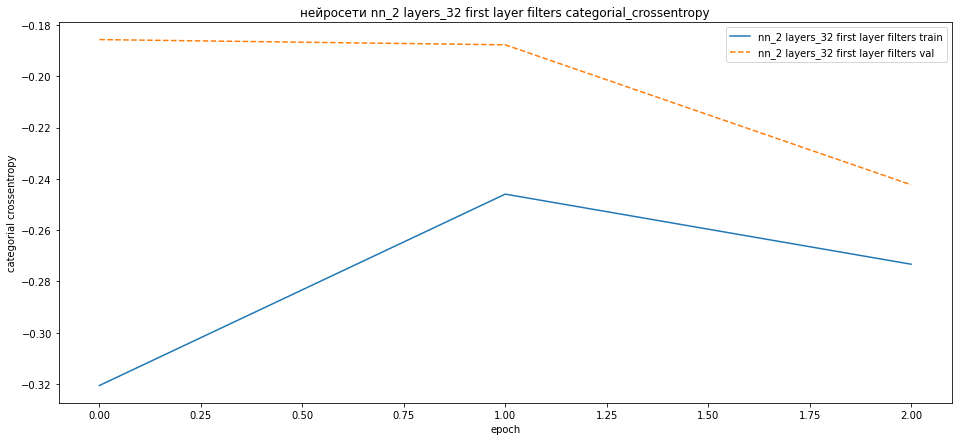

Epoch 1/2
196/196 [==============================] - 5s 25ms/step - loss: 0.7582 - accuracy: 0.7380 - val_loss: 0.8279 - val_accuracy: 0.7104
Epoch 2/2
196/196 [==============================] - 5s 28ms/step - loss: 0.7247 - accuracy: 0.7495 - val_loss: 0.7440 - val_accuracy: 0.7468


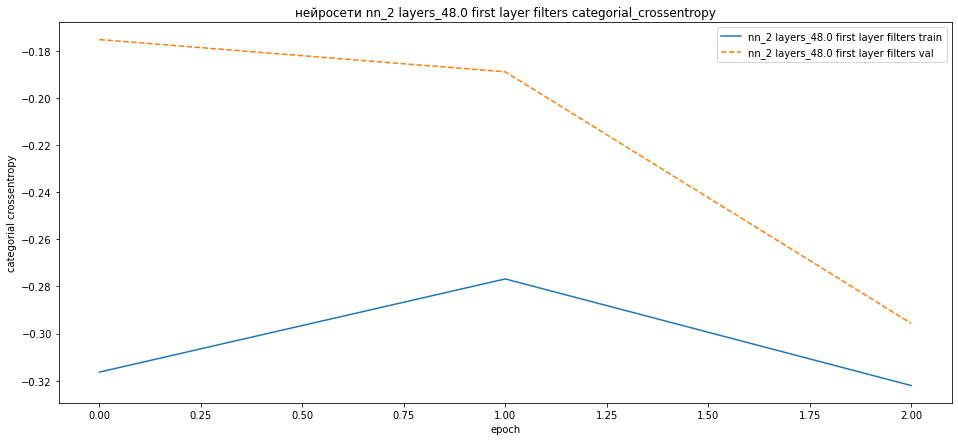

Epoch 1/2
196/196 [==============================] - 7s 33ms/step - loss: 1.6653 - accuracy: 0.3957 - val_loss: 1.3351 - val_accuracy: 0.5196
Epoch 2/2
196/196 [==============================] - 6s 31ms/step - loss: 1.2518 - accuracy: 0.5561 - val_loss: 1.1089 - val_accuracy: 0.6027


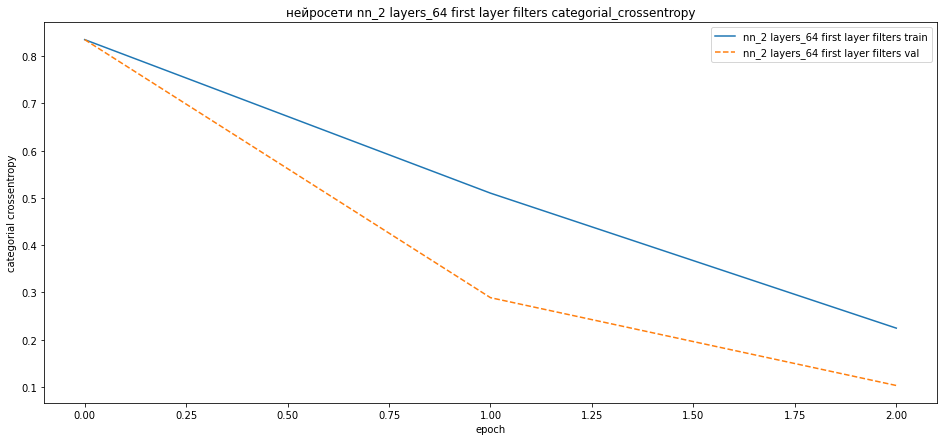

Epoch 1/2
196/196 [==============================] - 10s 46ms/step - loss: 1.6472 - accuracy: 0.4050 - val_loss: 1.3273 - val_accuracy: 0.5277
Epoch 2/2
196/196 [==============================] - 9s 44ms/step - loss: 1.2041 - accuracy: 0.5739 - val_loss: 1.0630 - val_accuracy: 0.6247


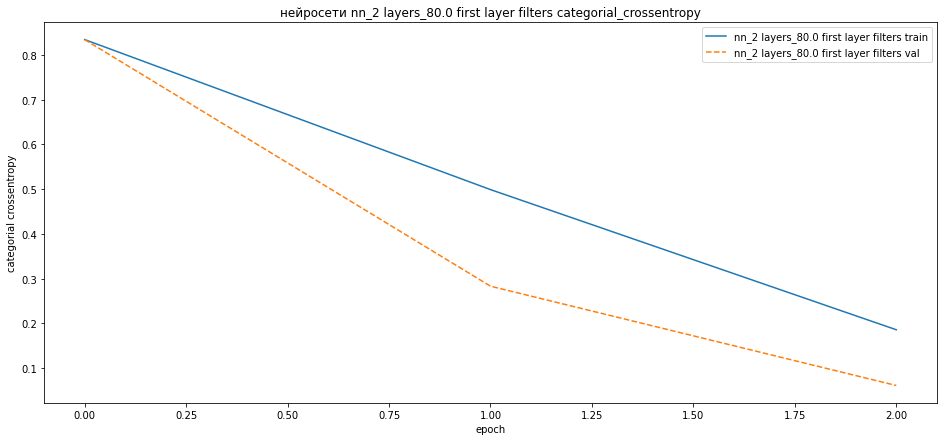

Epoch 1/2
196/196 [==============================] - 4s 19ms/step - loss: 1.7474 - accuracy: 0.3598 - val_loss: 1.4107 - val_accuracy: 0.4940
Epoch 2/2
196/196 [==============================] - 3s 18ms/step - loss: 1.3781 - accuracy: 0.5023 - val_loss: 1.2220 - val_accuracy: 0.5656


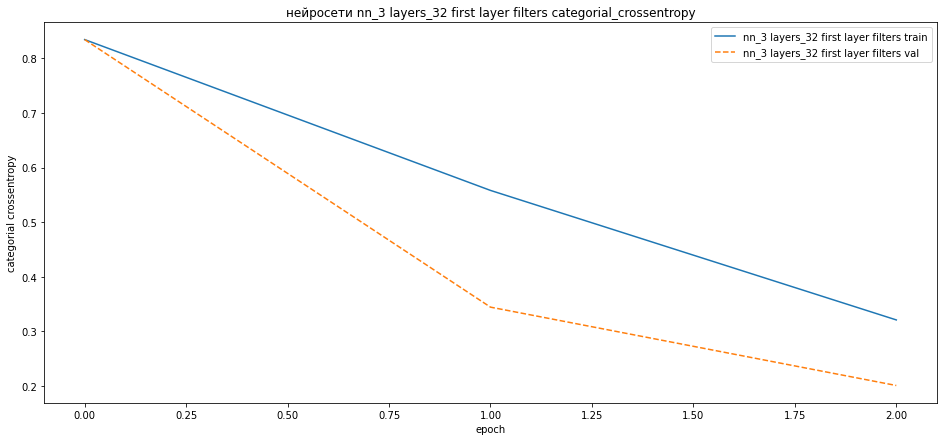

Epoch 1/2
196/196 [==============================] - 6s 28ms/step - loss: 1.7389 - accuracy: 0.3584 - val_loss: 1.4427 - val_accuracy: 0.4725
Epoch 2/2
196/196 [==============================] - 5s 27ms/step - loss: 1.3505 - accuracy: 0.5130 - val_loss: 1.1646 - val_accuracy: 0.5891


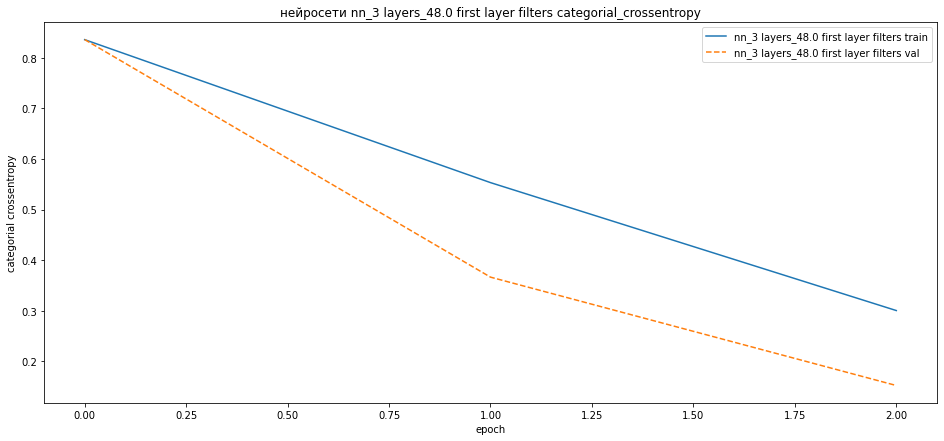

Epoch 1/2
196/196 [==============================] - 7s 34ms/step - loss: 1.7106 - accuracy: 0.3702 - val_loss: 1.3886 - val_accuracy: 0.4998
Epoch 2/2
196/196 [==============================] - 6s 33ms/step - loss: 1.2877 - accuracy: 0.5371 - val_loss: 1.1046 - val_accuracy: 0.6164


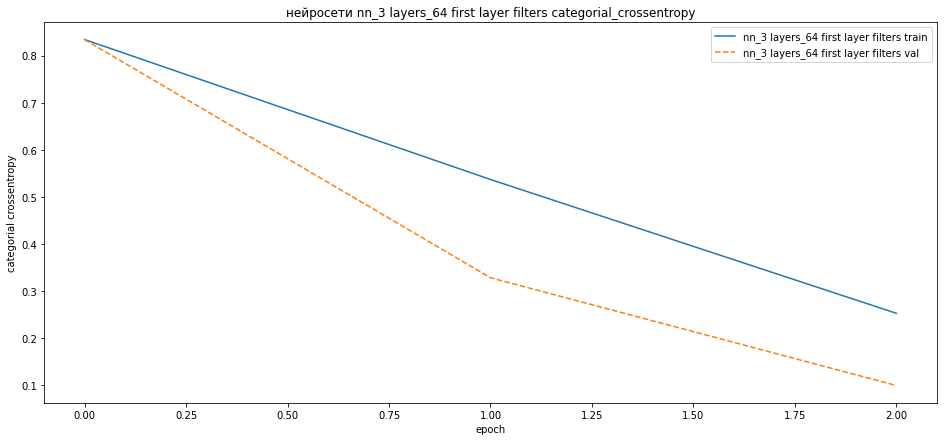

Epoch 1/2
196/196 [==============================] - 10s 48ms/step - loss: 1.6872 - accuracy: 0.3814 - val_loss: 1.3797 - val_accuracy: 0.5002
Epoch 2/2
196/196 [==============================] - 9s 47ms/step - loss: 1.2585 - accuracy: 0.5510 - val_loss: 1.0867 - val_accuracy: 0.6117


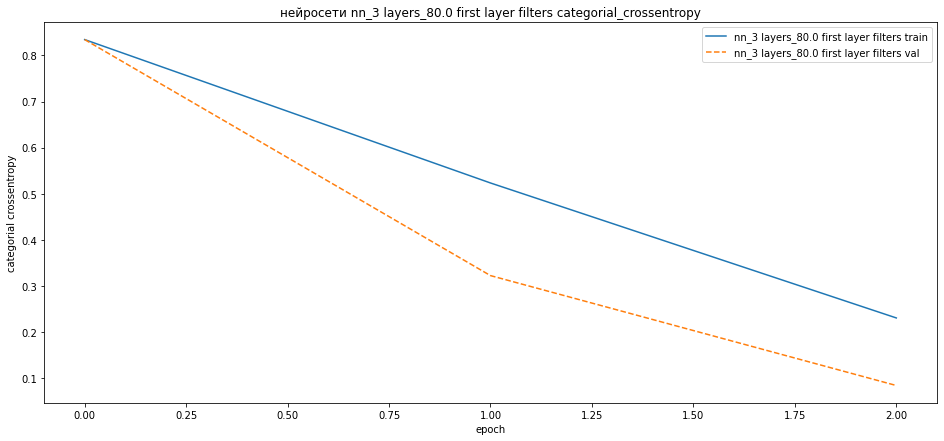

Epoch 1/2
196/196 [==============================] - 5s 20ms/step - loss: 1.7957 - accuracy: 0.3233 - val_loss: 1.5175 - val_accuracy: 0.4419
Epoch 2/2
196/196 [==============================] - 4s 19ms/step - loss: 1.4622 - accuracy: 0.4609 - val_loss: 1.2926 - val_accuracy: 0.5268


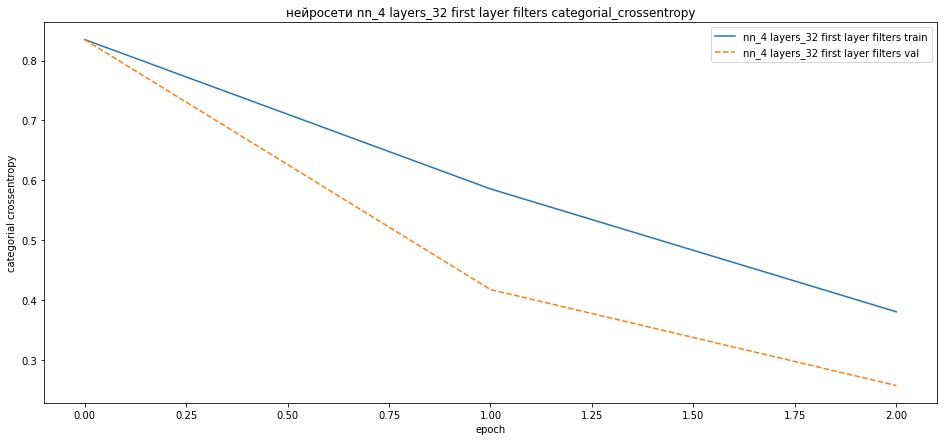

Epoch 1/2
196/196 [==============================] - 7s 30ms/step - loss: 1.8191 - accuracy: 0.3220 - val_loss: 1.4782 - val_accuracy: 0.4544
Epoch 2/2
196/196 [==============================] - 6s 28ms/step - loss: 1.3947 - accuracy: 0.4883 - val_loss: 1.2119 - val_accuracy: 0.5649


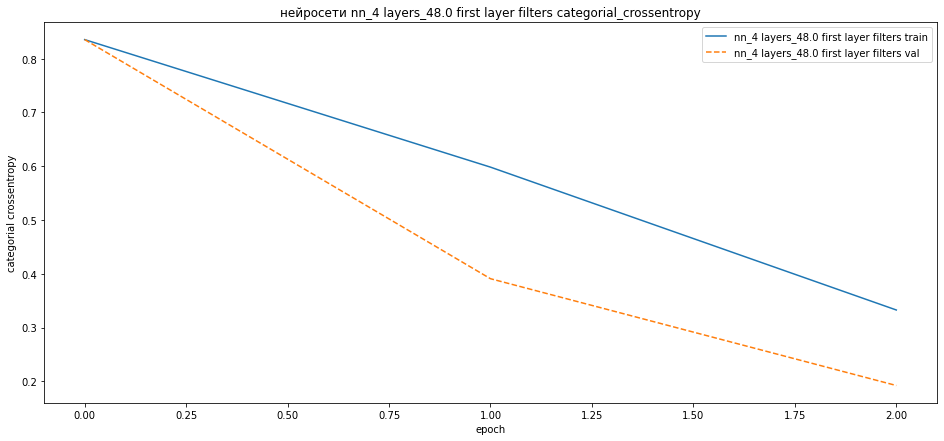

Epoch 1/2
196/196 [==============================] - 8s 36ms/step - loss: 1.8249 - accuracy: 0.3223 - val_loss: 1.5216 - val_accuracy: 0.4422
Epoch 2/2
196/196 [==============================] - 7s 35ms/step - loss: 1.3934 - accuracy: 0.4901 - val_loss: 1.2360 - val_accuracy: 0.5470


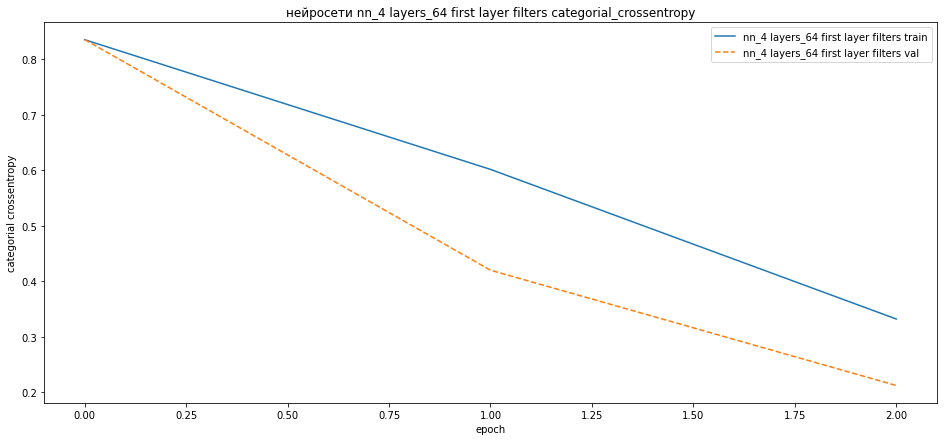

Epoch 1/2
196/196 [==============================] - 11s 49ms/step - loss: 1.7957 - accuracy: 0.3313 - val_loss: 1.4794 - val_accuracy: 0.4511
Epoch 2/2
196/196 [==============================] - 9s 48ms/step - loss: 1.3496 - accuracy: 0.5044 - val_loss: 1.1541 - val_accuracy: 0.5826


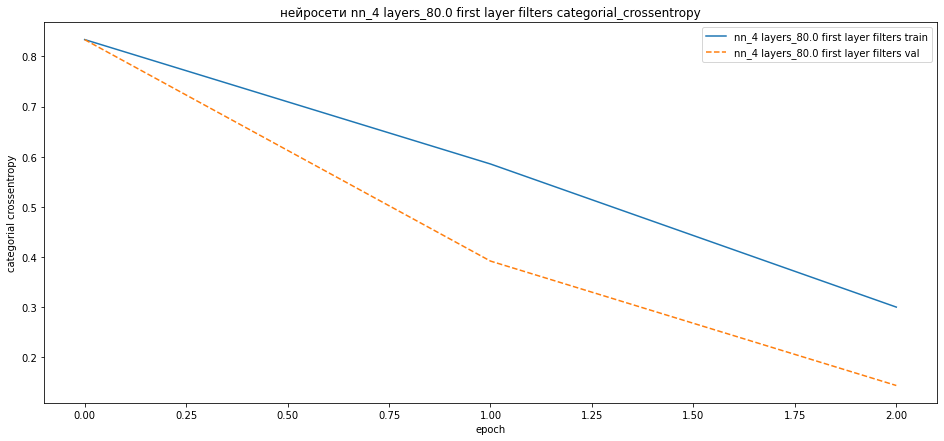

Epoch 1/2
196/196 [==============================] - 5s 21ms/step - loss: 1.9381 - accuracy: 0.2660 - val_loss: 1.6116 - val_accuracy: 0.3912
Epoch 2/2
196/196 [==============================] - 4s 20ms/step - loss: 1.5457 - accuracy: 0.4242 - val_loss: 1.3654 - val_accuracy: 0.4959


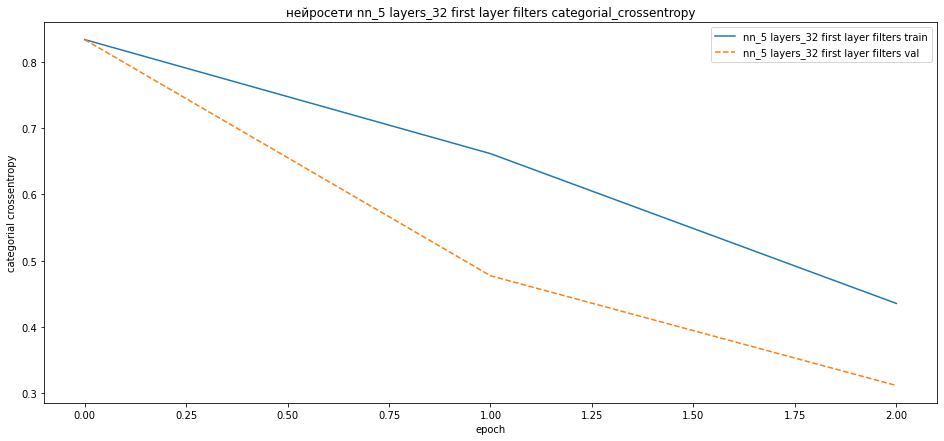

Epoch 1/2
196/196 [==============================] - 7s 32ms/step - loss: 1.8744 - accuracy: 0.2866 - val_loss: 1.5594 - val_accuracy: 0.4228
Epoch 2/2
196/196 [==============================] - 6s 31ms/step - loss: 1.4860 - accuracy: 0.4471 - val_loss: 1.2915 - val_accuracy: 0.5233


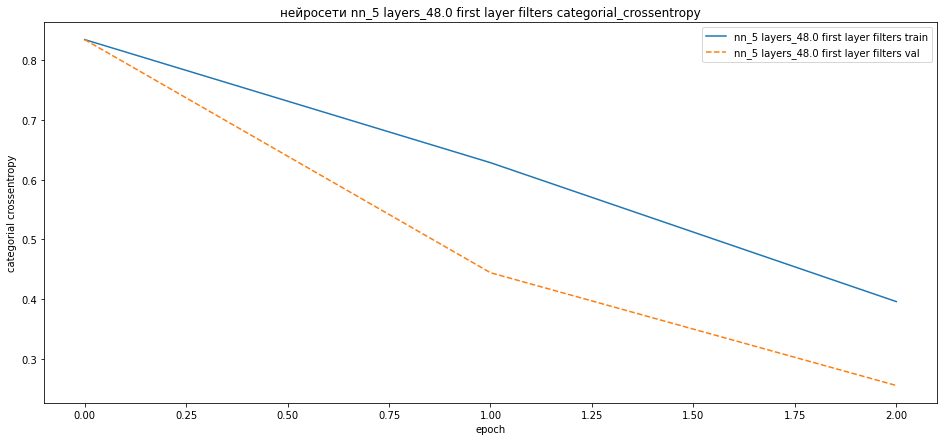

Epoch 1/2
196/196 [==============================] - 8s 37ms/step - loss: 1.8885 - accuracy: 0.2851 - val_loss: 1.5419 - val_accuracy: 0.4254
Epoch 2/2
196/196 [==============================] - 7s 36ms/step - loss: 1.4443 - accuracy: 0.4650 - val_loss: 1.2712 - val_accuracy: 0.5415


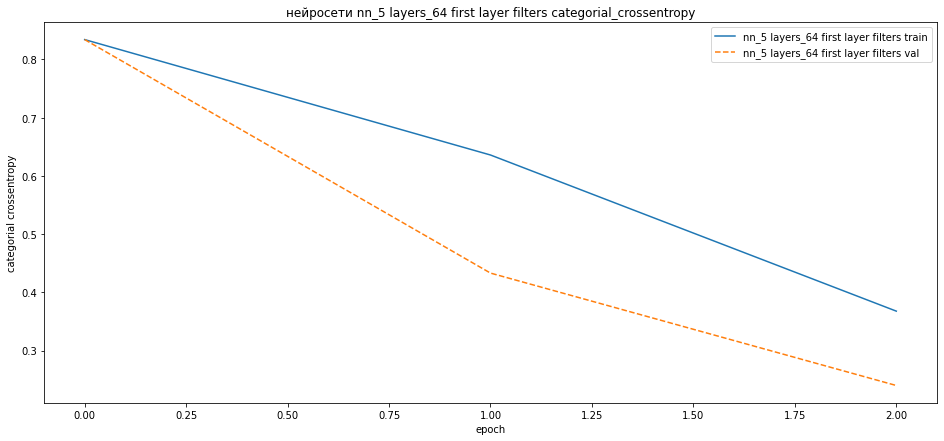

Epoch 1/2
196/196 [==============================] - 11s 51ms/step - loss: 1.8579 - accuracy: 0.2944 - val_loss: 1.5567 - val_accuracy: 0.4197
Epoch 2/2
196/196 [==============================] - 10s 50ms/step - loss: 1.4064 - accuracy: 0.4774 - val_loss: 1.2264 - val_accuracy: 0.5549


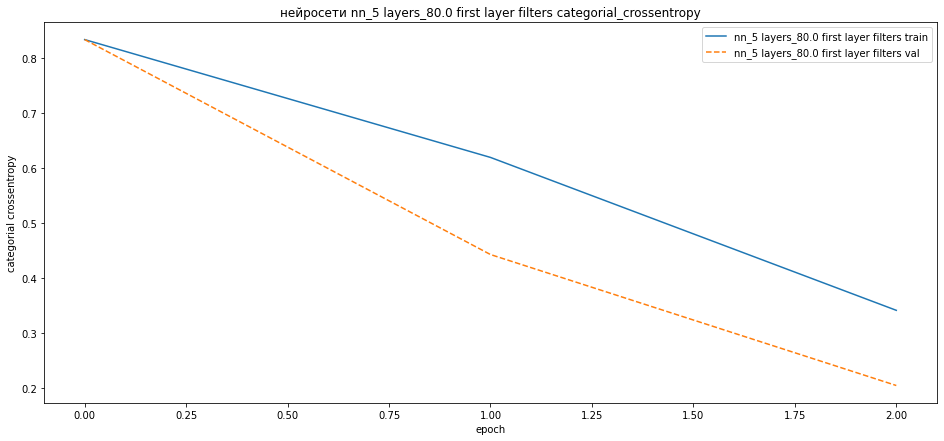

In [16]:
num_epochs = 2
epoch = np.arange(num_epochs+1)
model_names = []
losses = []
loss_fn = tf.keras.losses.CategoricalCrossentropy()
batch_size = 256

for name, model in models.items():
    plt.figure(figsize=(16, 7))
    h0_train = model.evaluate(X_train, y_train, verbose=0)
    h0_val = model.evaluate(X_test, y_test, verbose=0)

    # проводим обучение модели 
    h = model.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=1)

    # картинки
    
    plt.plot(epoch, np.log([h0_train[0]] + h.history['loss']),
              '-', label=name + ' train')
    plt.plot(epoch, np.log([h0_val[0]] + h.history['val_loss']),
              '--', label=name + ' val')
    print('=' * 20)

    plt.legend()
    plt.title(f'нейросети {name} categorial_crossentropy')
    plt.xlabel('epoch')
    plt.ylabel('categorial crossentropy')
    plt.show()
    model_names.append(name)
    losses.append(loss_fn(y_test[:100], model(X_test[:100]))) 
results = pd.DataFrame(model_names, columns=['Модель'])
results['loss на тесте'] = losses

In [17]:
results

,Модель,loss на тесте
0,nn_2 layers_32 first layer filters,"tf.Tensor(0.68858874, shape=(), dtype=float32)"
1,nn_2 layers_48.0 first layer filters,"tf.Tensor(0.60467917, shape=(), dtype=float32)"
2,nn_2 layers_64 first layer filters,"tf.Tensor(0.9665263, shape=(), dtype=float32)"
3,nn_2 layers_80.0 first layer filters,"tf.Tensor(0.912117, shape=(), dtype=float32)"
4,nn_3 layers_32 first layer filters,"tf.Tensor(1.1364822, shape=(), dtype=float32)"
5,nn_3 layers_48.0 first layer filters,"tf.Tensor(1.0173069, shape=(), dtype=float32)"
6,nn_3 layers_64 first layer filters,"tf.Tensor(0.9908947, shape=(), dtype=float32)"
7,nn_3 layers_80.0 first layer filters,"tf.Tensor(1.012566, shape=(), dtype=float32)"
8,nn_4 layers_32 first layer filters,"tf.Tensor(1.2418203, shape=(), dtype=float32)"
9,nn_4 layers_48.0 first layer filters,"tf.Tensor(1.1417079, shape=(), dtype=float32)"


In [18]:
res = results.copy()
res['loss на тесте'] = res['loss на тесте'].apply(lambda x: x.numpy())
res.sort_values(by='loss на тесте')

,Модель,loss на тесте
1,nn_2 layers_48.0 first layer filters,0.604679
0,nn_2 layers_32 first layer filters,0.688589
3,nn_2 layers_80.0 first layer filters,0.912117
2,nn_2 layers_64 first layer filters,0.966526
6,nn_3 layers_64 first layer filters,0.990895
7,nn_3 layers_80.0 first layer filters,1.012566
5,nn_3 layers_48.0 first layer filters,1.017307
11,nn_4 layers_80.0 first layer filters,1.081617
15,nn_5 layers_80.0 first layer filters,1.106712
4,nn_3 layers_32 first layer filters,1.136482


### 5. Бенчмарк

Создам полносвязную сеть с похожим количеством параметров и сравню результаты

In [24]:
X1_train = X_train.reshape((50000, 3, 32 * 32))
X1_train = X1_train[:, 0, :]
X1_test = X_test.reshape((10000, 3, 32 * 32))
X1_test = X1_test[:, 0, :]
X1_train.shape, X1_test.shape

((50000, 1024), (10000, 1024))

Epoch 1/5
196/196 [==============================] - 1s 5ms/step - loss: 2.0954 - accuracy: 0.2208 - val_loss: 1.9678 - val_accuracy: 0.2816
Epoch 2/5
196/196 [==============================] - 1s 4ms/step - loss: 1.9599 - accuracy: 0.2824 - val_loss: 1.9009 - val_accuracy: 0.3098
Epoch 3/5
196/196 [==============================] - 1s 4ms/step - loss: 1.9141 - accuracy: 0.3025 - val_loss: 1.8801 - val_accuracy: 0.3213
Epoch 4/5
196/196 [==============================] - 1s 4ms/step - loss: 1.8781 - accuracy: 0.3190 - val_loss: 1.8543 - val_accuracy: 0.3297
Epoch 5/5
196/196 [==============================] - 1s 4ms/step - loss: 1.8537 - accuracy: 0.3267 - val_loss: 1.8521 - val_accuracy: 0.3318


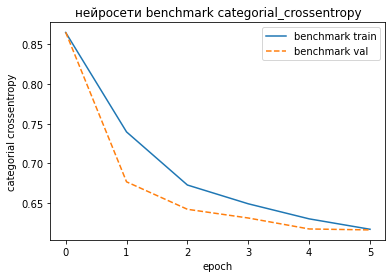

In [28]:
epochs=5
model = Sequential([
    Dense(512, input_shape=(32 * 32,), activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
    ])
epoch = np.arange(epochs+1)

model.compile(
        optimizer='Adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )
h0_train = model.evaluate(X1_train, y_train, verbose=0)
h0_val = model.evaluate(X1_test, y_test, verbose=0)

# проводим обучение модели 
h = model.fit(X1_train, y_train,
                epochs=epochs,
                batch_size=256,
                validation_data=(X1_test, y_test),
                verbose=1)

# картинки

plt.plot(epoch, np.log([h0_train[0]] + h.history['loss']),
          '-', label='benchmark train')
plt.plot(epoch, np.log([h0_val[0]] + h.history['val_loss']),
          '--', label='benchmark val')
print('=' * 20)

plt.legend()
plt.title(f'нейросети benchmark categorial_crossentropy')
plt.xlabel('epoch')
plt.ylabel('categorial crossentropy')
plt.show()

In [31]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()
benchmark_loss = loss_fn(y_test, model(X1_test))
benchmark_loss.numpy()

1.8521312

### 6. Выводы и комментарии

1. Мне пришлось примерно в 10 раз снизить суммарное количество параметров каждой сети по сравнению с изначальным - к сожалению, иначе не хватает бесплатных ресурсов колаба.  
2. Лучше всего в таких условиях себя показали свёртки с небольшим количеством слоёв и фильтров. А с увеличением этих параметров точность падает - видимо, нужно больше эпох и больший размер полносвязного слоя.
3. Классическая полносвязная сеть показывает результат хуже, чем свертки, на таком же количестве нейронов.